# Is there a correlation between good catchers and wins?
#### Rafi Kigner and Josh Leeman

## Imports

In [92]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Processing - Setup

#### We first compiled data of cumulative catchers' statistics from all 30 MLB teams and put it into a JSON file using Google Firebase. 
#### For each MLB team we listed their win totals and catchers' batting average, on-base percentage, and slugging percentage.

#### We then imported the JSON file into our .ipynb file in order to convert it to a CSV file.


In [93]:
with open('catchersToWins.json') as json_file:
    data = json.load(json_file)
    print(data)
catchers_stats = data[' Team_Catchers_Cumulative_Stats_To_Wins']

{' Team_Catchers_Cumulative_Stats_To_Wins': [{'Name': 'Giants', '0BP': 360, 'BA': 271, 'SLG': 446, 'Wins': 107}, {'Name': 'Reds', 'OBP': 352, 'BA': 260, 'SLG': 400, 'Wins': 83}, {'Name': 'Red Sox', 'OBP': 319, 'BA': 266, 'SLG': 365, 'Wins': 92}, {'Name': 'Royals', 'OBP': 310, 'BA': 264, 'SLG': 496, 'Wins': 74}, {'Name': 'Nationals', 'OBP': 352, 'BA': 260, 'SLG': 416, 'Wins': 65}, {'Name': 'Brewers', 'OBP': 327, 'BA': 244, 'SLG': 421, 'Wins': 95}, {'Name': 'Dodgers', 'OBP': 343, 'BA': 243, 'SLG': 448, 'Wins': 106}, {'Name': 'Phillies', 'OBP': 312, 'BA': 236, 'SLG': 383, 'Wins': 82}, {'Name': 'Diamond Backs', 'OBP': 324, 'BA': 236, 'SLG': 410, 'Wins': 52}, {'Name': 'Rays', 'OBP': 309, 'BA': 234, 'SLG': 494, 'Wins': 100}, {'Name': 'Cardinals', 'OBP': 293, 'BA': 233, 'SLG': 339, 'Wins': 90}, {'Name': 'Blue Jays', 'OBP': 305, 'BA': 233, 'SLG': 403, 'Wins': 91}, {'Name': 'Padres', 'OBP': 310, 'BA': 231, 'SLG': 327, 'Wins': 79}, {'Name': 'Tigers', 'OBP': 282, 'BA': 226, 'SLG': 451, 'Wins': 77

## Data Processing - Convert from JSON to CSV to Dataframe

#### After converting from the JSON to CSV, we made a dataframe consisting off all 30 MLB teams and their respective cumulative statistics for all their catchers.

In [94]:
catchers_stats = data[' Team_Catchers_Cumulative_Stats_To_Wins']
data_file = open('/Users/joshleeman/src/Tamid-TechEdu-S22/Final/catchersToWins.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(catchers_stats[0].keys())
for catcher in catchers_stats:
    csv_writer.writerow(catcher.values())
data_file.close()
df = pd.read_csv('catchersToWins.csv')
df

,Name,0BP,BA,SLG,Wins
0,Giants,360,271,446,107
1,Reds,352,260,400,83
2,Red Sox,319,266,365,92
3,Royals,310,264,496,74
4,Nationals,352,260,416,65
5,Brewers,327,244,421,95
6,Dodgers,343,243,448,106
7,Phillies,312,236,383,82
8,Diamond Backs,324,236,410,52
9,Rays,309,234,494,100


## Data Integration

#### Now that we have our dataframe, we need to clean and alter our dataframe to have only what we want to draw a conclusion.

#### We began with combining the SLG and OBP columns from the dataframe to form another stat called OPS. 

#### We then made two additional dataframes, one consisting of teams with at least 85 wins and the other consisting of all other teams.

In [95]:
df['OPS'] = df['0BP'] + df['SLG']
good_teams = df.loc[df['Wins'] >= 85]
good_teams

,Name,0BP,BA,SLG,Wins,OPS
0,Giants,360,271,446,107,806
2,Red Sox,319,266,365,92,684
5,Brewers,327,244,421,95,748
6,Dodgers,343,243,448,106,791
9,Rays,309,234,494,100,803
10,Cardinals,293,233,339,90,632
11,Blue Jays,305,233,403,91,708
18,White Sox,365,220,434,93,799
21,Athletics,288,216,387,86,675
23,Mariners,285,214,370,90,655


In [96]:
bad_teams = df.loc[df['Wins'] < 85]
bad_teams

,Name,0BP,BA,SLG,Wins,OPS
1,Reds,352,260,400,83,752
3,Royals,310,264,496,74,806
4,Nationals,352,260,416,65,768
7,Phillies,312,236,383,82,695
8,Diamond Backs,324,236,410,52,734
12,Padres,310,231,327,79,637
13,Tigers,282,226,451,77,733
14,Angels,298,225,366,77,664
15,Orioles,285,223,344,52,629
16,Rockies,303,223,438,74,741


## Data Visualization

#### We then created two graphs. One being a scatterplot with a line of best fit between all of the team's OPS and total wins.

#### The other graph is a scatterplot relating a team's BA to total wins.


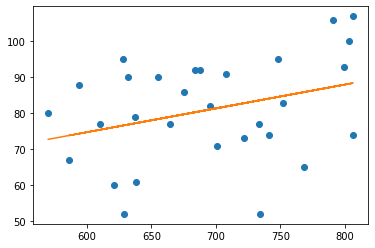

In [97]:
OPS = 'OPS'
Wins = 'Wins'
plt.plot(OPS, Wins, data = df, linestyle = 'none', marker = 'o')
m, b = np.polyfit(df[OPS], df[Wins], 1)
plt.plot(df[OPS], m * df[OPS] + b)

#### We can see that while there is a positive correlation between OPS and Wins, it is not that strong meaning catchers' OPS is not a good indicator of a team's win percentage.

In [98]:
sns.boxplot(y=good_teams['OPS'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### This is a correlogram relating all the stats to each other. In the bottom middle graph, you can see that increased SLG is directly related to the increase OPS, which makes because of how we derived OPS. However in the second row relating all stats to Wins, you can see that no graph has a super strong correlation meaning that no one aspect of the game leads to team wins. 

## Data Validation

#### Our null hypothesis is that there is a direct positive correlation between cumulative team catchers OPS and total team wins. Our alternate hypothesis is that there is minimal relation between cumulative team catchers OPS and total team wins.